In [1]:
#data collection
import pandas as pd
dataset=pd.read_csv("insurance_pre.csv")
#data preprocessed
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)
independent=dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent=dataset[['charges']]
#train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [2]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 12.8 MB/s eta 0:00:00


In [4]:
#model creation
import lightgbm
from lightgbm import LGBMRegressor
Regressor=LGBMRegressor()
Regressor.fit(xtrain,ytrain)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 936, number of used features: 5
[LightGBM] [Info] Start training from score 13232.425214


LGBMRegressor()

In [5]:
ypred=Regressor.predict(xtest)

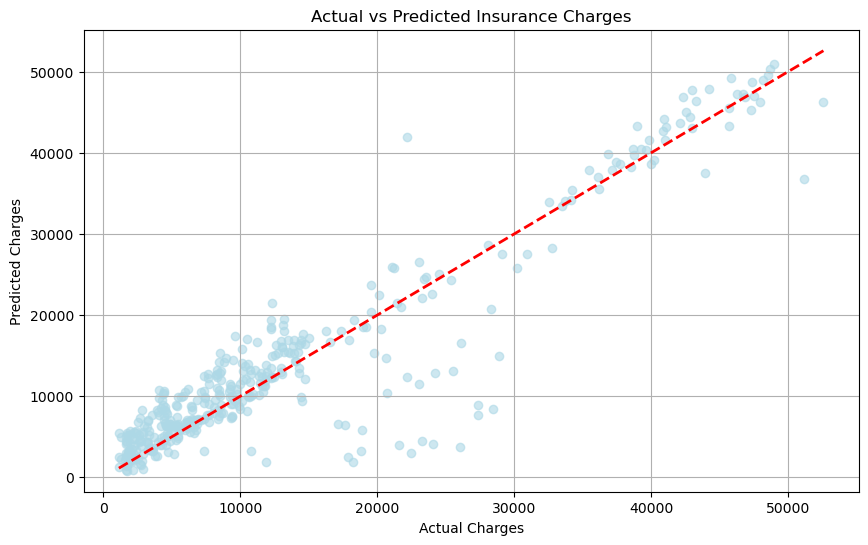

In [6]:
#plot creation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, color='lightblue', alpha =0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Insurance Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)
plt.show()

In [7]:
#evaluation metrics
ypred=Regressor.predict(xtest)
from sklearn.metrics import r2_score
rscore=r2_score(ytest,ypred)
rscore

0.8653607758000829